# 모델 훈련
- 모델의 작동 방식을 잘 알고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼 파라미터를 빠르게 찾을 수 있음
- 또한 작동 원리를 이해하면 디버깅이나 에러를 효율적으로 분석하는 데 도움이 됨

- 이 장의 대부분의 주제는 신경망을 이해하고 구축하고 훈련시키는 데 필수

- 가장 간만한 모델 중 하나인 선형 회귀부터 시작. 이 모델을 훈련시키는 두 가지 방법
 - 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석학적으로 구하기
 - 경사하강법(GD)라고 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화(결국에는 위의 방법과 동일한 파라미터로 수렴)
  - 경사 하강법의 변종으로 신경망에서 사용하게 될 배치 경사 하강법, 미니배치 경사 하강법, 확률적 경사 하강법도 살펴 볼 예정

- 그 이후에는 비선형 데이터셋에 훈련시킬 수 있는 조금 더 복잡한 모델인 다항 회귀 탐색
 - 이 모델은 선형 회귀보다 파라미터가 더 많아서 훈련 데이터에 과대적합되기 더 쉬움
 - 따라서  학습 곡선을 사용해서 모델이 과대적합되는지 감지하는 방법도 탐색할 예정
- 그 후, 훈련 세트의 과대적합을 감소시킬 수 있는 규제 기법을 탐색

- 마지막으로 분류 작업에 널리 사용되는 모델인 로지스틱 회귀와 소프트맥스 회귀 탐색

In [1]:
import numpy as np
X = 2* np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

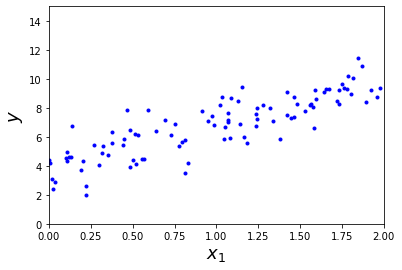

In [3]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize = 18 )
plt.ylabel("$y$", fontsize = 18 )
plt.axis([0,2,0,15])
plt.savefig("generated_data_plt")

- 정규방정식
$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

- 정규방정식을 통해 theta_hat 계산
- 넘파이 선형대수 모듈(np.linalg)에 있는 inv() 함수를 사용해서 역행렬 구하고 dot() 메서드를 사용해서 행렬 곱셈 수행

In [4]:
X_b = np.c_[np.ones((100,1)),X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.86384096],
       [2.96322069]])

$ \hat{y} = \mathbf{X} \hat{\theta}$

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.86384096],
       [9.79028233]])

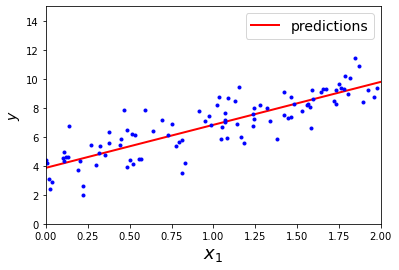

In [7]:
plt.plot(X_new, y_predict,"r-", linewidth = 2, label = 'predictions')
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 14)
plt.legend(loc = "best", fontsize = 14)
plt.axis([0,2,0,15])
plt.savefig("linear_model_predictions_plot")
plt.show()

### 사이킷런을 이용한 선형회귀

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86384096]), array([[2.96322069]]))

In [9]:
lin_reg.predict(X_new)

array([[3.86384096],
       [9.79028233]])

- LinearRegression 클래스는 scipy.lstsq() 함수를 사용하므로 이 함수를 직접 사용할 수 있음

In [10]:
theta_best_svd, residuals,rank,  s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd
# residual = (yhat-y)**2


array([[3.86384096],
       [2.96322069]])

- 이 함수는 $ \mathbf{X}^{+} \mathbf{y} $ 계산
- $ \mathbf{X}^{+} $ 은 Moore-Penrose inverse matrix

$ \hat{\theta} = \mathbf{X}^{-1} \hat{y}$

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.86384096],
       [2.96322069]])

# 배치 경사 하강법을 사용한 선형 회귀

In [12]:
from IPython.display import Image

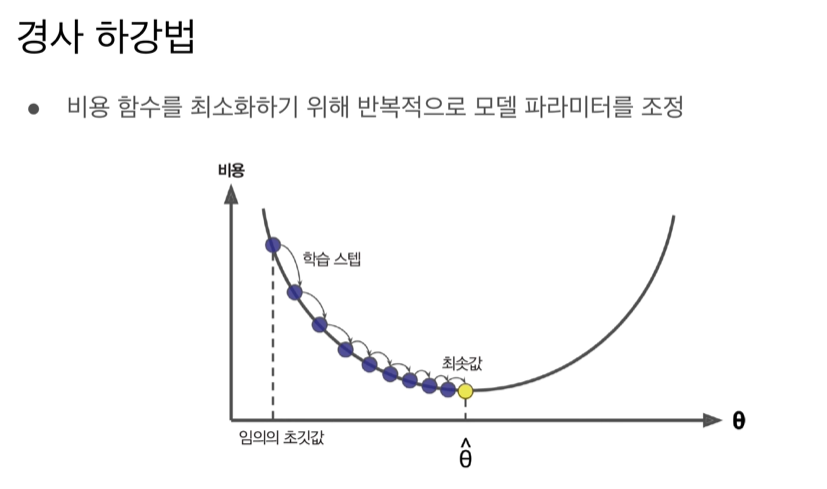

In [13]:
Image("pic_modeltrain/1.png")

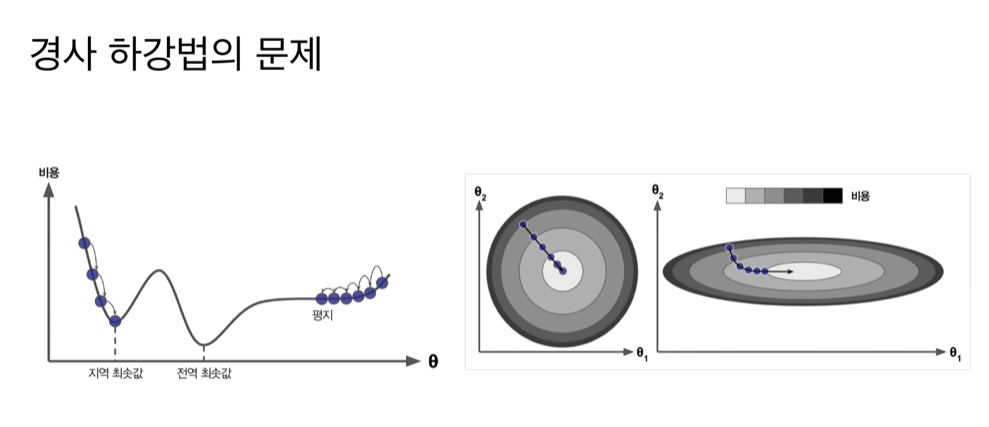

In [14]:
Image("pic_modeltrain/2.png")

- 경사하강법의 문제로 다소 복잡한 비용함수에서 전역 최솟값에 도달하지 못하고 지역 최솟값에 갇히거나 평지에 갇히는 경우가 있음
- 특성 간의 scale이 맞지 않는 경우에는 최솟값을 찾는 과정이 비효율적일 수 있음

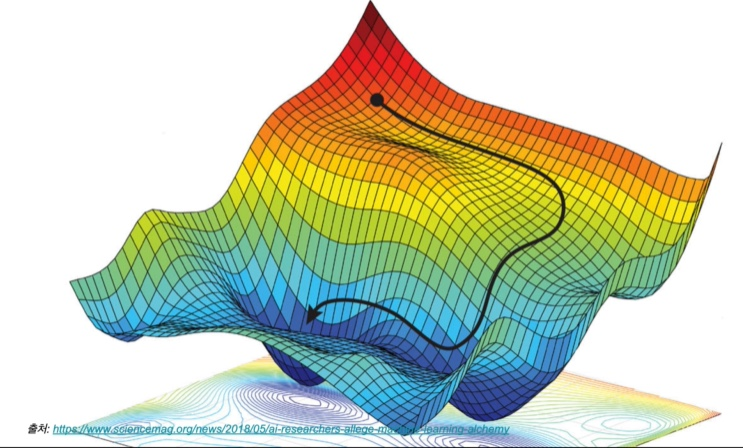

In [15]:
Image("pic_modeltrain/3.jpg")

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

$ \eta $는 학습률이다. 임의의 값으로 직접 설정해줘야 함

In [16]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_iterations) :
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [17]:
theta

array([[3.86384096],
       [2.96322069]])

In [18]:
X_new_b.dot(theta)

array([[3.86384096],
       [9.79028233]])

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path = None) : 
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iterations in range(n_iterations) :
        if iterations< 10 :   # 초기 10번에 대해서만 plot 그리기
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iterations > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta* gradients
        if theta_path is not None :
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)

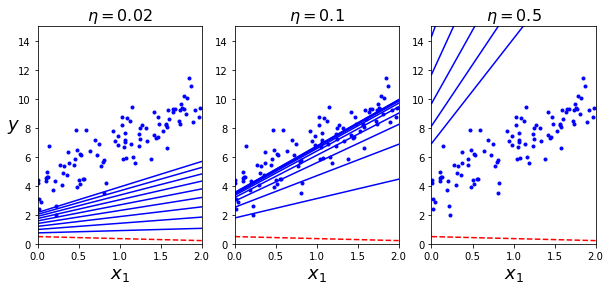

In [20]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize = (10,4))
plt.subplot(131) ; plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132) ; plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133) ; plot_gradient_descent(theta, eta = 0.5)

plt.savefig("gradient_descent_plot")
plt.show()


# 확률적 경사 하강법

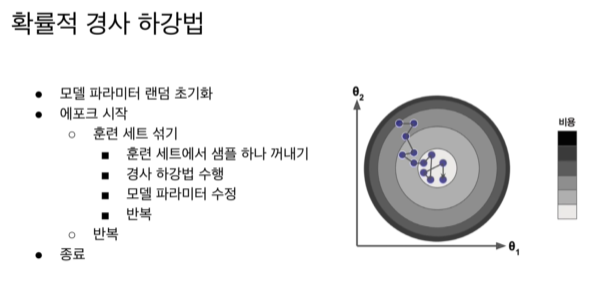

In [21]:
Image("pic_modeltrain/4.png")

- 경사 하강법 자체는 동일한 과정이지만 샘플이 하나임
- 지정한 에포크만큼 반복
- 샘플을 하나씩 사용한다는 점에서 차이가 있음

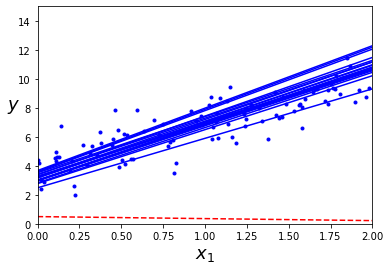

In [22]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20 :
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m + i) # 최적값으로 가까워질수록 변동폭을 줄이기 위해 학습할수록 𝜂값 줄이기
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize= 18)
plt.axis([0,2,0,15])
plt.savefig('sgd_plot')
plt.show()

In [23]:
theta

array([[3.85823713],
       [2.9845546 ]])

In [24]:
from sklearn.linear_model import SGDRegressor
#learning_rate = 'invscaling', eta0/t**0.25, 'constant', 'optimal', 'adaptive'
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3 , penalty = None, eta0 = 0.1 , random_state = 42)
sgd_reg.fit(X,y.ravel())  #ravel 함수를 이용해서 2차원 배열을 1차원 배열로 만들어줌

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [25]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([3.87439572]), array([2.98768308]))

# 미니배치 경사 하강법
- 배치 경사 하강법과 확률적 경사 하강법의 중간
- 몇 개(2의 배수)개의 값으로 계산

In [26]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [27]:
theta

array([[3.88838491],
       [2.96730679]])

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

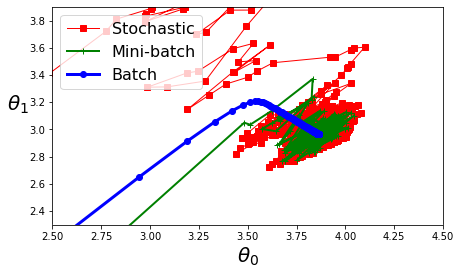

In [29]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.savefig("gradient_descent_paths_plot")
plt.show()

- 확률적 경사하강법의 경우 변동이 심하다
- 미니배치 경사하강법의 경우 변동이 상대적으로 작고 빠르게 최적점을 찾아감
- 배치 경사하강법의 경우 모든 데이터를 사용하기 때문에 변동이 작고 빠르게 찾아감

- 결과의 측면에서는 배치 경사하강법이 가장 바람직하지만 데이터의 양이 아주 방대한 경우가 많기 때문에 사용하기 어려운 경우가 종종 있음
- 대안으로 미니배치 경사하강법을 사용하는 경우가 많다

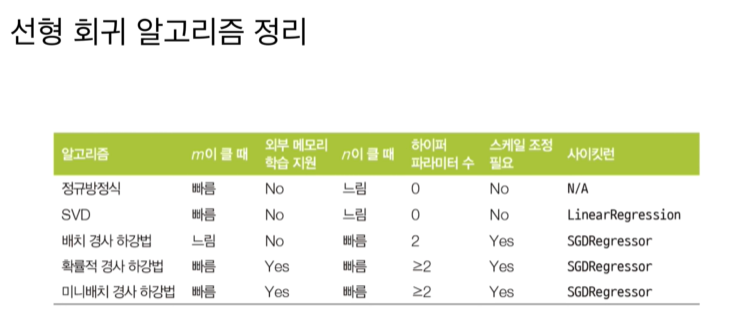

In [30]:
Image("pic_modeltrain/5.png")

# 다항 회귀

In [31]:
import numpy as np
import numpy.random as rnd
np.random.seed(42)

In [32]:
m = 100
X = 6 * np.random.rand(m,1) - 3  # U(-3,3)에서 100개의 sample 추출
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) # 1/2x^2 + x + 2 에 노이즈 추가

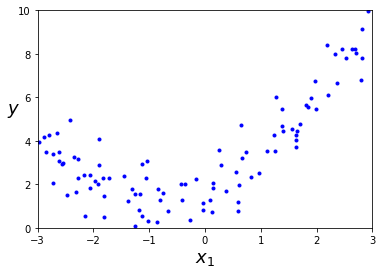

In [33]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0 , fontsize = 18)
plt.axis([-3,3,0,10])
plt.savefig("quadratic_data_plot")
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
# include_bias = True가 기본값, 편향을 위한 특성 1 
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [35]:
X_poly[0] # x와 x^2 출력

array([-0.75275929,  0.56664654])

In [36]:
poly_features.get_feature_names() # 어떻게 만들어졌는지 확인

['x0', 'x0^2']

- X_poly는 이제 원래 특성 X와 이 특성의 제곱을 포함
- 이 확장된 훈련 데이터에 LinearRegression을 적용

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

- fit_intercept = False 옵션 추가

In [38]:
lin_reg2 = LinearRegression(fit_intercept = False)
lin_reg2.fit(X_poly,y)
lin_reg2.intercept_, lin_reg.coef_

(0.0, array([[0.93366893, 0.56456263]]))

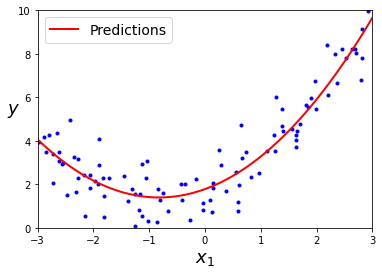

In [39]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',linewidth=2, label = 'Predictions')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.legend(loc='upper left', fontsize = 14)
plt.axis([-3,3,0,10])
plt.savefig('quadratic_predictions_plot')
plt.show()

- 과대적합, 과소적합

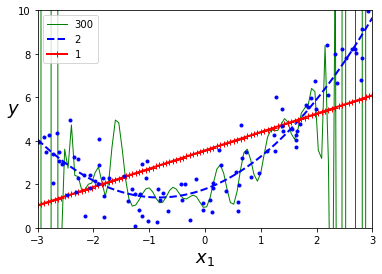

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler), #차원이 높아지면 값의 변동이 커지기 때문에 회귀 모형임에도 std_scaler적용
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("high_degree_polynomials_plot")
plt.show()

# 학습 곡선
- 과대적합, 과소적합을 판단하는 그래프 중 하나로 학습 곡선(learning curve)이 있음
- 훈련 세트에 대한 점수, 검증 세트에 대한 점수

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14) 
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

### 단순 회귀(과소 적합)

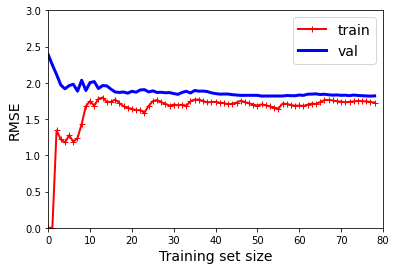

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.savefig("underfitting_learning_curves_plot")  
plt.show()                                      

- 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접

### 10차 다항 회귀(과대 적합)

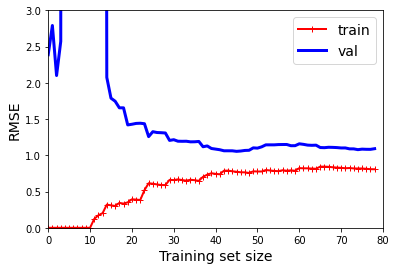

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          
plt.savefig("learning_curves_plot")  
plt.show()                        

- 훈련 데이터의 오차가 단순회귀 모형보다 훨씬 낮음
- 두 곡선 사이에 공간이 있음. 즉, 흔련 데이터에서의 모델 성능이 검증 데이터보다 훨씬 낫다는 것이고 과대적합 모델의 특징
 - 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다

# 규제가 있는 모델

In [44]:
np.random.seed(42)
m = 20
X = 3 * np.random.randn(m,1)
y = 1 + 0.5 * X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

**릿지 회귀의 비용 함수**

$
\text{J}(\boldsymbol{\theta})
 = \text{MSE}(\boldsymbol{\theta}) + \boldsymbol{\alpha} \dfrac{1}{2} \sum \limits_{i=1}^{n}{\theta_i}^2
$